In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

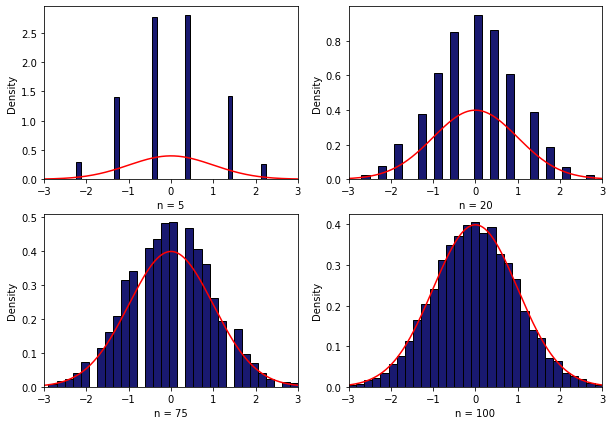

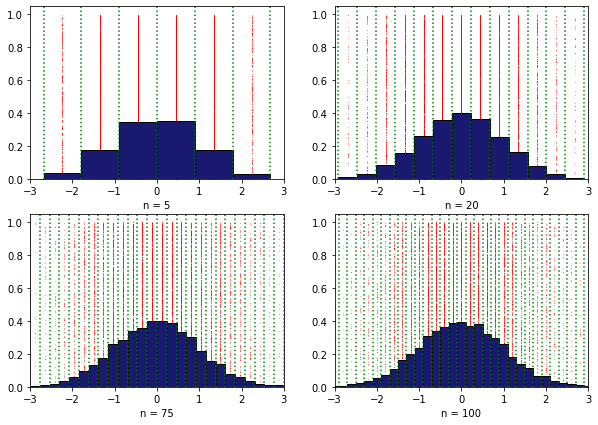

In [1]:
num_samples = 10000
sample_sizes = np.array([5, 20, 75, 100])

sample_std_means = np.empty(shape=(num_samples, len(sample_sizes)))

for col, size in enumerate(sample_sizes):
    sample_means = np.empty(num_samples)
    for i in range(num_samples):
        sample_means[i] = np.mean(st.bernoulli.rvs(p=0.5, size=size))
    sample_demeaned = sample_means - 0.5
    z_ed = sample_demeaned / (0.5 / np.sqrt(size))
    sample_std_means[:, col] = z_ed

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

x = np.linspace(st.norm.ppf(0.001), st.norm.ppf(0.999), 1000)
y = st.norm.pdf(x)

for i, ax in enumerate(axes.flatten()):
    ax.hist(sample_std_means[:, i], bins=40, edgecolor='k', color='midnightblue', density=True)
    ax.set_ylabel('Density')
    ax.set_xlabel(f'n = {sample_sizes[i]}')
    # bin_width = (sample_std_means[:, i].max() - sample_std_means[:, i].min()) / 40
    # ax.plot(x, y * num_samples * bin_width, color='red')
    ax.plot(x, y, color='red')
    ax.set_xlim((-3, 3))
plt.show()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(sample_std_means[:, i], np.random.uniform(0, 1, num_samples), color='r', alpha=0.5, lw=0, s=1)
    # there are n+1 possible mean values for n bernoulli trials
    # n+2 boundaries will be needed to separate the bins
    bins = np.arange(-1, sample_sizes[i]+1) / sample_sizes[i]
    bins += (bins[1] - bins[0]) / 2 # shift half a bin
    bins -= 0.5 # subtract the mean
    bins /= (0.5 / np.sqrt(sample_sizes[i])) # correction factor
    for b in bins:
        ax.axvline(b, color='g', ls=':')
    ax.set_xlabel(f'n = {sample_sizes[i]}')
    ax.set_xlim((-3, 3))


    ax.hist(sample_std_means[:, i], bins=bins, edgecolor='k', color='midnightblue', density=True)